In [1]:
import tensorflow as tf
import numpy as np
#import setGPU
from importlib import reload
import dadrah.playground.test_gradient_tape as tegrta
import dadrah.selection.loss_strategy as ls
import dadrah.selection.discriminator as disc

ModuleNotFoundError: No module named 'dadrah'

In [2]:
tf.__version__

'2.2.0'

In [3]:
x = tf.random.uniform([3000, 1], minval=1, maxval=100, dtype=tf.float32)
y = tf.random.uniform([3000,1], minval=1, maxval=10, dtype=tf.float32)

In [4]:
x.shape

TensorShape([3000, 1])

In [5]:
quantile = 0.1
strategy = ls.combine_loss_min

In [6]:
import dadrah.selection.quantile_regression as qure
reload(qure)
reload(disc)
discriminator = disc.QRDiscriminator(quantile=quantile, loss_strategy=strategy, epochs=10, n_nodes=30)
discriminator.fit(x, y)
print(discriminator.model.summary())


Start of epoch 0
Training loss (for one batch) at step 0: 142.17120361328125
Training loss (for one batch) at step 2: 119.99320983886719
Training loss (for one batch) at step 4: 84.17875671386719
Training loss (for one batch) at step 6: 54.75967025756836
Training loss (for one batch) at step 8: 59.2042236328125
Training loss (for one batch) at step 10: 69.57876586914062
Training loss (for one batch) at step 12: 62.67546081542969
Training loss (for one batch) at step 14: 54.283287048339844
Training loss (for one batch) at step 16: 51.496402740478516
Training loss (for one batch) at step 18: 58.47557067871094
Training loss (for one batch) at step 20: 59.661895751953125
Training loss (for one batch) at step 22: 58.61177062988281

Start of epoch 1
Training loss (for one batch) at step 0: 52.76274490356445
Training loss (for one batch) at step 2: 53.90526580810547
Training loss (for one batch) at step 4: 49.281837463378906
Training loss (for one batch) at step 6: 53.007118225097656
Trainin

In [7]:
x_test = tf.random.uniform([300, 1], minval=1, maxval=100, dtype=tf.float32)

In [8]:
x_test

<tf.Tensor: shape=(300, 1), dtype=float32, numpy=
array([[ 9.920164 ],
       [61.444466 ],
       [79.72258  ],
       [99.88019  ],
       [11.634789 ],
       [64.567345 ],
       [41.09856  ],
       [35.97979  ],
       [65.91308  ],
       [77.14003  ],
       [38.83267  ],
       [34.518124 ],
       [40.181625 ],
       [93.052895 ],
       [99.196495 ],
       [11.585918 ],
       [92.9842   ],
       [23.480211 ],
       [35.9555   ],
       [94.17641  ],
       [24.325344 ],
       [92.15333  ],
       [45.68191  ],
       [64.08234  ],
       [56.854847 ],
       [45.84055  ],
       [ 8.648931 ],
       [44.039642 ],
       [58.54842  ],
       [64.27069  ],
       [51.68272  ],
       [10.009503 ],
       [36.914345 ],
       [46.982475 ],
       [65.73589  ],
       [55.834908 ],
       [55.98276  ],
       [14.50957  ],
       [96.24013  ],
       [64.313866 ],
       [74.743774 ],
       [26.961506 ],
       [27.457981 ],
       [47.651432 ],
       [34.95206  ],
     

In [9]:
reload(disc)
y = discriminator.predict(x_test)

In [10]:
y

array([[9.140653 ],
       [9.301202 ],
       [9.370041 ],
       [9.439928 ],
       [9.146412 ],
       [9.3129835],
       [9.238287 ],
       [9.223189 ],
       [9.318062 ],
       [9.360418 ],
       [9.231604 ],
       [9.218878 ],
       [9.235582 ],
       [9.416879 ],
       [9.43762  ],
       [9.146247 ],
       [9.416647 ],
       [9.185789 ],
       [9.223118 ],
       [9.420671 ],
       [9.188429 ],
       [9.413841 ],
       [9.251806 ],
       [9.311153 ],
       [9.284761 ],
       [9.252274 ],
       [9.136383 ],
       [9.246962 ],
       [9.290276 ],
       [9.311865 ],
       [9.269506 ],
       [9.140953 ],
       [9.225946 ],
       [9.255642 ],
       [9.317392 ],
       [9.281753 ],
       [9.282188 ],
       [9.156066 ],
       [9.42764  ],
       [9.312027 ],
       [9.3513775],
       [9.196589 ],
       [9.198053 ],
       [9.257616 ],
       [9.220158 ],
       [9.271226 ],
       [9.157412 ],
       [9.207491 ],
       [9.317711 ],
       [9.4004135],


In [11]:
weights = discriminator.model.get_weights()

In [12]:
discriminator.save('./my_new_model.h5')

In [15]:
reload(disc)
new_discriminator = disc.Discriminator(quantile=quantile, loss_strategy=strategy)

In [ ]:
%debug

> <ipython-input-26-af832292da6f>(1)<module>()
----> 1 dict(new_discriminator)

ipdb> b dadrah/selection/discriminator:102
Breakpoint 2 at /eos/home-k/kiwoznia/dev/data_driven_anomaly_hunting/dadrah/selection/discriminator.py:102
ipdb> new_discriminator.load('./my_new_model.h5')


In [16]:
import ipdb; ipdb.set_trace()
new_discriminator.load('./my_new_model.h5')

--Return--
None
> <ipython-input-16-b579923c21eb>(1)<module>()
----> 1 import ipdb; ipdb.set_trace()
      2 new_discriminator.load('./my_new_model.h5')

ipdb> c


In [ ]:
ipdb.set_trace()
new_discriminator.__dict__

--Return--
None
> <ipython-input-17-fb655b3cf6a1>(1)<module>()
----> 1 ipdb.set_trace()
      2 new_discriminator.__dict__



In [25]:
loaded_weights = new_discriminator.model.get_weights()

AttributeError: 'Discriminator' object has no attribute 'model'

In [32]:
weights[0]

array([[-0.52151966,  0.34217453,  0.01405535,  0.59535474,  0.69920963,
        -0.1658983 , -0.44183353, -0.02300867, -0.06862972, -0.00430826,
        -0.24678671,  0.7089294 ,  0.0510585 ,  0.01305069, -0.27448598,
        -0.06475051, -0.4706956 , -0.4577948 ,  0.19247283, -0.01148568]],
      dtype=float32)

In [33]:
loaded_weights[0]

array([[-0.52151966,  0.34217453,  0.01405535,  0.59535474,  0.69920963,
        -0.1658983 , -0.44183353, -0.02300867, -0.06862972, -0.00430826,
        -0.24678671,  0.7089294 ,  0.0510585 ,  0.01305069, -0.27448598,
        -0.06475051, -0.4706956 , -0.4577948 ,  0.19247283, -0.01148568]],
      dtype=float32)

In [34]:
for i in range(len(weights)):
    assert np.allclose(weights[0], loaded_weights[0])

In [35]:
y_loaded = loaded_model.predict(x_test)

In [36]:
assert np.allclose(y, y_loaded)

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
xx_n = 2000
xx_min = 1200.
xx_range = 1000.
xx = (np.random.exponential(scale=0.5, size=xx_n)*xx_range)+xx_min

(array([139., 118., 110., 106.,  96.,  82.,  81.,  80.,  72.,  67.,  67.,
         71.,  54.,  51.,  48.,  49.,  48.,  44.,  35.,  40.,  36.,  24.,
         27.,  22.,  29.,  33.,  21.,  31.,  22.,  28.,  12.,  17.,  19.,
         15.,  17.,  14.,  12.,   5.,  14.,   0.,   7.,   9.,   7.,   3.,
         10.,   2.,   7.,   2.,   5.,   3.,   6.,   7.,   2.,   6.,   4.,
          1.,   2.,   5.,   3.,   3.,   0.,   3.,   1.,   4.,   3.,   1.,
          2.,   1.,   4.,   3.,   1.,   2.,   5.,   0.,   0.,   2.,   4.,
          3.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,
          0.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.]),
 array([1201.42854264, 1233.88833714, 1266.34813165, 1298.80792615,
        1331.26772066, 1363.72751517, 1396.18730967, 1428.64710418,
        1461.10689869, 1493.56669319, 1526.0264877 , 1558.4862822 ,
        1590.94607671, 1623.40587122, 1655.86566572, 1688.32546023,
        1720.78525473, 1753.24504924, 1785.704

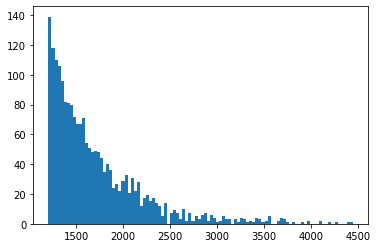

In [14]:
plt.hist(xx,bins=100)

In [18]:
trans_layer = tf.keras.layers.Lambda(lambda x: tf.math.log(x-xx_min))

In [19]:
xx_trans = trans_layer(xx)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



(array([0.01293841, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0064692 , 0.01940762, 0.        , 0.        ,
        0.        , 0.        , 0.00646921, 0.01940762, 0.00646921,
        0.01293841, 0.02587679, 0.01293841, 0.03234604, 0.00646921,
        0.01293839, 0.00646921, 0.04528438, 0.01940765, 0.01293839,
        0.01293843, 0.02587679, 0.02587679, 0.01940765, 0.03234599,
        0.03234609, 0.02587679, 0.03881518, 0.01940765, 0.05175358,
        0.04528438, 0.06469217, 0.05175358, 0.05175374, 0.08409956,
        0.05822277, 0.05822295, 0.06469197, 0.0388153 , 0.07116117,
        0.09056876, 0.11644591, 0.10350716, 0.12291513, 0.12291437,
        0.14232278, 0.08409982, 0.1423219 , 0.18113808, 0.15526121,
        0.18113808, 0.19407532, 0.21995338, 0.17466886, 0.14879108,
        0.25876869, 0.25229947, 0.18113696, 0.25876869, 0.30405321,
        0.27170544, 0.29758399, 0.31052242, 0.29758399, 0.31052051,
        0.34933773, 0.36227616, 0.37521228, 0.37

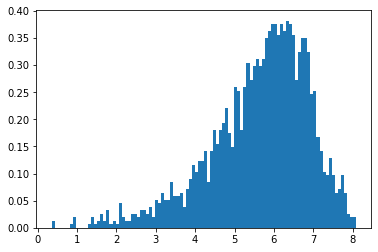

In [22]:
plt.hist(xx_trans.numpy(),bins=100,density=True)